# 세그멘테이션 데이터 전처리
---
### 전북대학교, 종양 재발 이미지 딥러닝 분류

- 0. install
- 1. how to use tool
- 2. data 이름 표기 약속

 ---

# 0. install
- 아나콘다 설치
    - https://www.anaconda.com/download/success
- 라벨링 툴 설치
  - 아나콘다 명령창 관리자 실행
  - conda create --name=labelme python=3.6
  - conda activate labelme
  - pip install labelme
  - labelme





---
# 1. tool 사용법

- 단축키(알고있으면 편리합니다)
    - 이미지 이동(파일이 여러개일경우): A, D
    - 폴리곤 생성 : ctrl+R
    - 폴리곤 삭제 : del
    - 폴리곤 복제 : ctrl+c, ctrl+v
    - 편집 모드 : ctrl+j
    - 저장 : ctrl+s

`-` 파일 오픈, 파일 셋 오픈

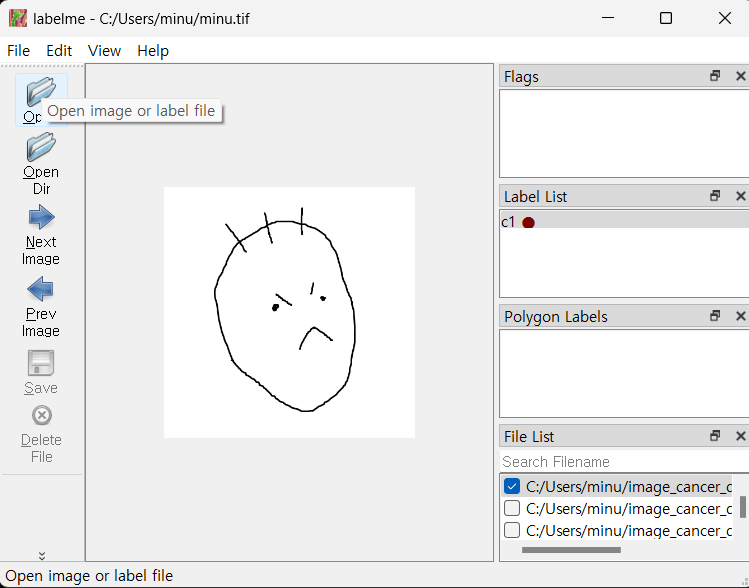

---
`-` 폴리곤 생성

- 폴리곤 생성 이름 설정

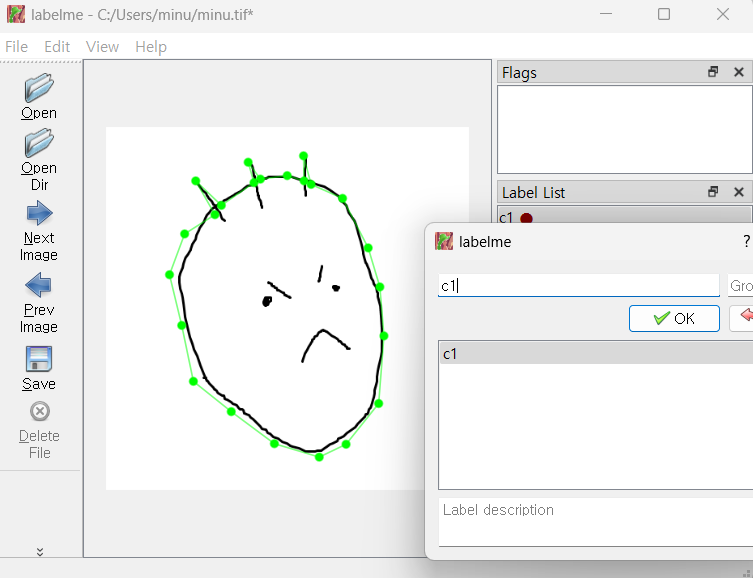

---

`-` 저장 (주의!!!!: 데이터 원본파일과 무조건 이름이 동일해야합니다 )

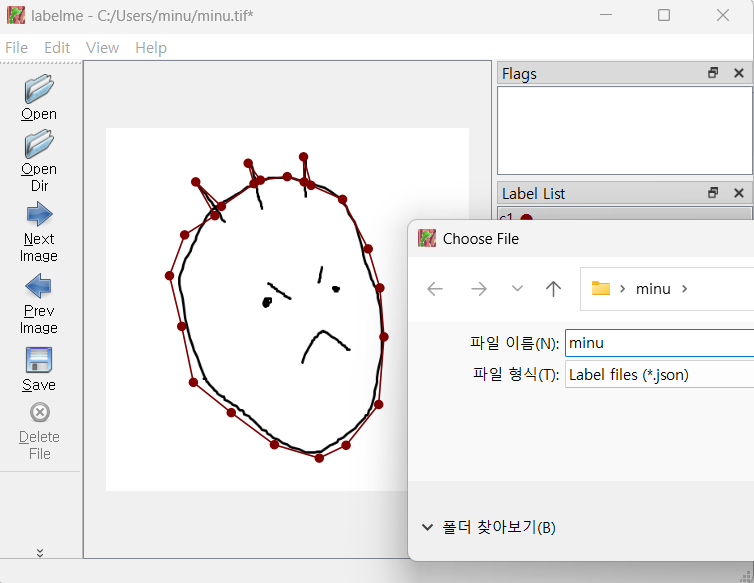

---
# 예제코드
- 폴리곤 내부의 정보만을 가져오기

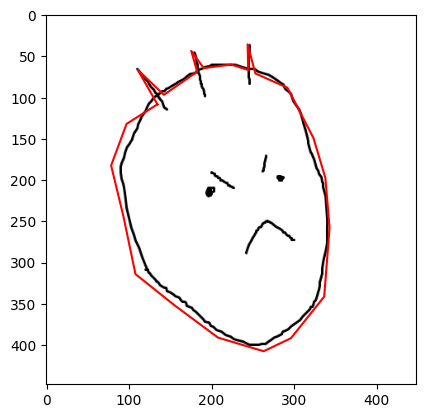

In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image, ImageDraw

#####################################################################################################
# JSON 파일 경로 설정
json_file_path = 'minu.json'
image_file_path = 'minu.tif'
image = Image.open(image_file_path)

# JSON 파일 열기
with open(json_file_path, 'r') as file:
    data = json.load(file)
#####################################################################################################
polygons= np.array(data['shapes'][0]['points']).flatten().tolist()
fig, ax = plt.subplots()

#for polygon_points in polygons:
# 폴리곤 좌표는 [x1, y1, x2, y2, ..., xn, yn] 형태로 저장되어 있다고 가정
x_coords = polygons[0::2]  # x 좌표들
y_coords = polygons[1::2]  # y 좌표들

# 폴리곤의 시작점과 끝점을 연결하기 위해 닫힘 처리
x_coords.append(x_coords[0])
y_coords.append(y_coords[0])

# 선으로 연결
ax.plot(x_coords, y_coords, c='r')
#ax.set_xlim(0, 448)  
#ax.set_ylim(0, 448)  
plt.gca().invert_yaxis() 
plt.imshow(image)# 이미지 좌표계에 맞게 Y축을 뒤집음
plt.show()

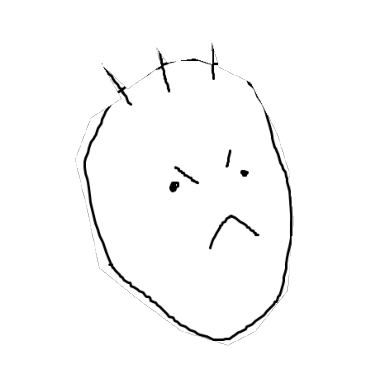

In [36]:
polygons = np.array(data['shapes'][0]['points'])  # 폴리곤 좌표

image = Image.open(image_file_path)
image_np = np.array(image) 

# 빈 마스크 이미지 생성 (이미지 크기와 동일, 검정색으로 시작)
mask_image = Image.new('L', (image_np.shape[1], image_np.shape[0]), 0)
pts = [(point[0], point[1]) for point in polygons]

# 마스크 이미지에 폴리곤 내부를 흰색(255)으로 채움
ImageDraw.Draw(mask_image).polygon(pts, outline=1, fill=255)
mask_np = np.array(mask_image)

# 마스크 적용: 폴리곤 내부만 남기고 나머지는 검정색으로 처리
result_image_np = np.zeros_like(image_np)
result_image_np[mask_np == 255] = image_np[mask_np ==255]

# 폴리곤의 경계를 구하고, 중심 좌표 계산
x_min = np.min(polygons[:, 0])
y_min = np.min(polygons[:, 1])
x_max = np.max(polygons[:, 0])
y_max = np.max(polygons[:, 1])

center_x = (x_min + x_max) // 2
center_y = (y_min + y_max) // 2

crop_size = 500 # 중심으로부터 거리
half_crop_size = crop_size // 2

# 자를 좌표 범위 계산
left = int(max(center_x - half_crop_size, 0))
top = int(max(center_y - half_crop_size, 0))
right = int(min(center_x + half_crop_size, image_np.shape[1]))
bottom = int(min(center_y + half_crop_size, image_np.shape[0]))
cropped_image = result_image_np[top:bottom, left:right]
cropped_pil_image = Image.fromarray(cropped_image)
plt.imshow(cropped_pil_image)
plt.axis('off')
plt.show()

---
# 2. 데이터 표기

`-` !!!
- 꼭 원본사진파일명과 json 파일명이 동일해야합니다!!
- dicom 파일 tif로 변환한 파일 제공
  - X_train image : 결측치를 제외한 환자 331 명의 5개의 순차적인 MRI 사진 -> 1655개
  - X_test image : 결측치를 제외한 환자 126 명의 5개의 순차적인 MRI 사진 -> 630개
 

`-` 파일 표기명

- $X_{set,j,i}$
- set : train, test
- j : 환자